In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset_path = './dataset/HASC/'
activity_folders = os.listdir(dataset_path)
print(activity_folders)

df = pd.DataFrame()
df_list = []

for i in range(len(activity_folders)):
    activity_folder = activity_folders[i]
    print(activity_folder)
    
    person_folder_path = dataset_path + activity_folder + '/'
    person_folders = os.listdir(person_folder_path)
    
    for j in range(len(person_folders)):
        person_folder = person_folders[j]
        
        csv_file_path = dataset_path + activity_folder + '/' + person_folder + '/'
        csv_files = os.listdir(csv_file_path)
        
        for k in range(len(csv_files)):
            csv_file = csv_files[k]
            #print(csv_file)
            
            data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
            data_frame['Activity'] = activity_folder
            df_list.append(data_frame)
        
df = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
df.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Activity']

['Jogging', 'Sit_Down', 'Skip', 'Stand_Up', 'Stay', 'Walk']
Jogging
Sit_Down
Skip
Stand_Up
Stay
Walk


In [3]:
print('Total rows : ', len(df))
df.head()

Total rows :  593233


,Timestamp,Ax,Ay,Az,Activity
0,10122.863440,0.618271,-1.966354,0.961472,Jogging
1,10122.934788,0.457809,-1.044403,0.726517,Jogging
2,10122.944823,0.724289,-0.825272,0.512680,Jogging
3,10122.954857,0.762573,-0.568726,0.249176,Jogging
4,10122.964863,0.736816,-0.304901,0.134369,Jogging


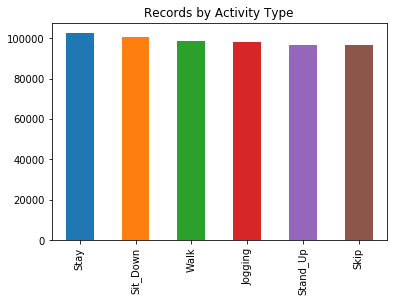

In [4]:
df['Activity'].value_counts().plot(kind='bar', title='Records by Activity Type', figsize=(6, 4),align='center');

# Remove activities

In [5]:
indexes = df[ (df['Activity'] == 'Stay') | (df['Activity'] == 'Skip') ].index
df.drop(indexes , inplace=True)

In [6]:
print('Total rows : ', len(df))
df.head()

Total rows :  394130


,Timestamp,Ax,Ay,Az,Activity
0,10122.863440,0.618271,-1.966354,0.961472,Jogging
1,10122.934788,0.457809,-1.044403,0.726517,Jogging
2,10122.944823,0.724289,-0.825272,0.512680,Jogging
3,10122.954857,0.762573,-0.568726,0.249176,Jogging
4,10122.964863,0.736816,-0.304901,0.134369,Jogging


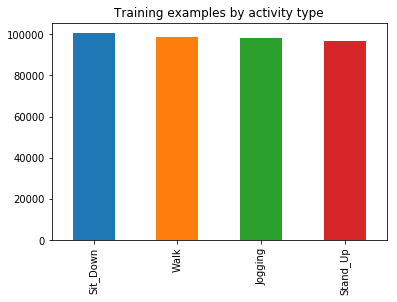

In [7]:
df['Activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

# Map and Sort

In [8]:
df['Activity'].value_counts()

Sit_Down    100558
Walk         98558
Jogging      98265
Stand_Up     96749
Name: Activity, dtype: int64

In [9]:
df['Activity'] = df['Activity'].map({'Jogging': 0, 'Walk': 1, 'Stand_Up': 2, 'Sit_Down': 3})

In [10]:
#df = df.sort_values('Activity')

In [11]:
df.head()

,Timestamp,Ax,Ay,Az,Activity
0,10122.863440,0.618271,-1.966354,0.961472,0
1,10122.934788,0.457809,-1.044403,0.726517,0
2,10122.944823,0.724289,-0.825272,0.512680,0
3,10122.954857,0.762573,-0.568726,0.249176,0
4,10122.964863,0.736816,-0.304901,0.134369,0


In [12]:
pd.options.mode.chained_assignment = None  # default='warn'
df['Ax'] = df['Ax'] / df['Ax'].max()
df['Ay'] = df['Ay'] / df['Ay'].max()
df['Az'] = df['Az'] / df['Az'].max()
# Round numbers
df = df.round({'Ax': 4, 'Ay': 4, 'Az': 4})

In [13]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []

for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['Ax'].values[i: i + N_TIME_STEPS]
    ys = df['Ay'].values[i: i + N_TIME_STEPS]
    zs = df['Az'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)
    
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(labels, dtype = np.int32)

In [14]:
Hasc_X_train = reshaped_segments 
Hasc_Y_train = labels

In [15]:
print(Hasc_X_train.shape)
print(Hasc_Y_train.shape)

(19697, 200, 3)
(19697,)


In [16]:
Hasc_X_train = Hasc_X_train.reshape((-1, 3, 1, 200))

In [17]:
print(Hasc_X_train.shape)
print(Hasc_Y_train)

(19697, 3, 1, 200)
[0 0 0 ... 1 1 1]


In [2]:
def load_hasc_data():
    dataset_path = './dataset/HASC/'
    activity_folders = os.listdir(dataset_path)
    print(activity_folders)

    df = pd.DataFrame()
    df_list = []

    for i in range(len(activity_folders)):
        activity_folder = activity_folders[i]
        #print(activity_folder)

        person_folder_path = dataset_path + activity_folder + '/'
        person_folders = os.listdir(person_folder_path)

        for j in range(len(person_folders)):
            person_folder = person_folders[j]

            csv_file_path = dataset_path + activity_folder + '/' + person_folder + '/'
            csv_files = os.listdir(csv_file_path)

            for k in range(len(csv_files)):
                csv_file = csv_files[k]
                #print(csv_file)

                data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
                data_frame['Activity'] = activity_folder
                df_list.append(data_frame)

    df = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
    df.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Activity']
    
    indexes = df[ (df['Activity'] == 'Stay') | (df['Activity'] == 'Skip') ].index
    df.drop(indexes , inplace=True)
    df['Activity'] = df['Activity'].map({'Jogging': 0, 'Walk': 1, 'Stand_Up': 2, 'Sit_Down': 3})
    
    pd.options.mode.chained_assignment = None  # default='warn'
    df['Ax'] = df['Ax'] / df['Ax'].max()
    df['Ay'] = df['Ay'] / df['Ay'].max()
    df['Az'] = df['Az'] / df['Az'].max()
    # Round numbers
    df = df.round({'Ax': 4, 'Ay': 4, 'Az': 4})
    
    N_TIME_STEPS = 200
    N_FEATURES = 3
    step = 20
    segments = []
    labels = []

    for i in range(0, len(df) - N_TIME_STEPS, step):
        xs = df['Ax'].values[i: i + N_TIME_STEPS]
        ys = df['Ay'].values[i: i + N_TIME_STEPS]
        zs = df['Az'].values[i: i + N_TIME_STEPS]
        label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)

    Hasc_X_train = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
    Hasc_Y_train = np.asarray(labels, dtype = np.int32)
    Hasc_X_train = Hasc_X_train.reshape((-1, 3, 1, 200))
    
    print('Hasc_X_train.shape : ', Hasc_X_train.shape)
    print('Hasc_Y_train.shape : ', Hasc_Y_train.shape)
    print('Hasc_Y_train values : ', Hasc_Y_train)
    
    return Hasc_X_train, Hasc_Y_train

In [3]:
if __name__ == '__main__':
    load_hasc_data()

['Jogging', 'Sit_Down', 'Skip', 'Stand_Up', 'Stay', 'Walk']
Hasc_X_train.shape :  (19697, 3, 1, 200)
Hasc_Y_train.shape :  (19697,)
Hasc_Y_train values :  [0 0 0 ... 1 1 1]
